In [26]:
from bilinear_interpolation import *
from PIL import Image
from IPython.display import display
from math import log10, sqrt
import cv2
from skimage.metrics import structural_similarity as ssim

# Testing bilinear interpolation

Original image


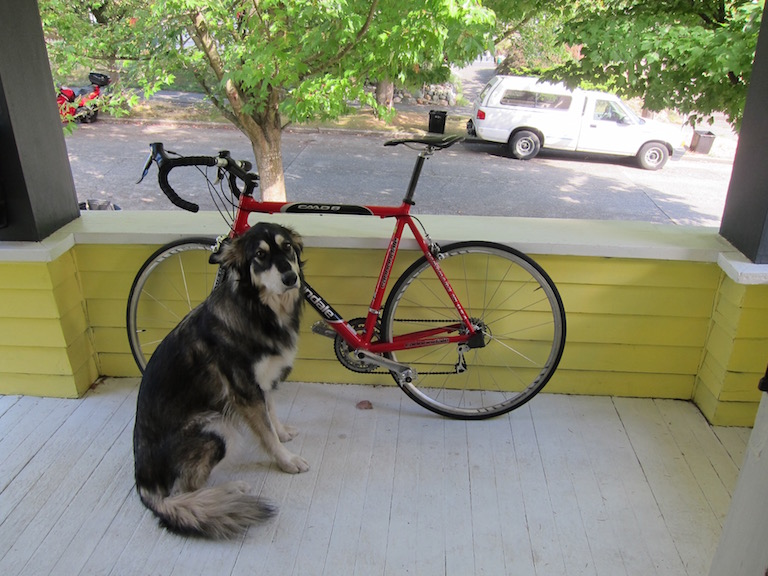

Low res image stretched to full size


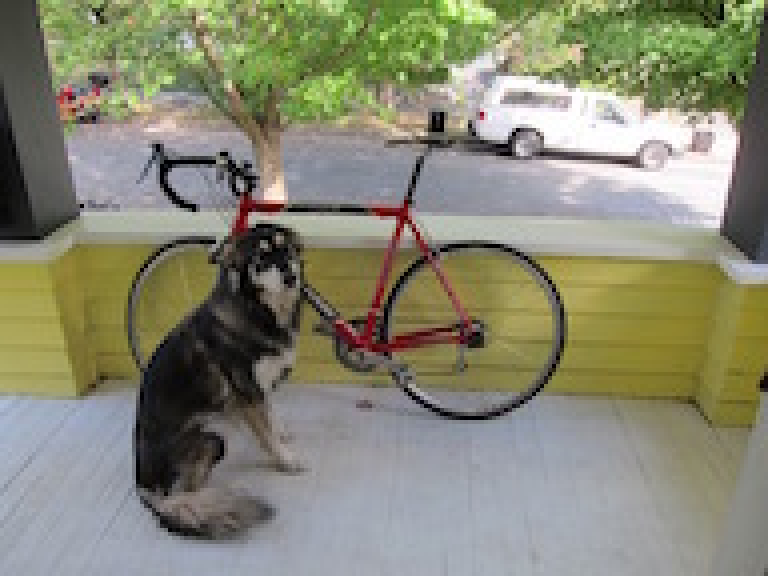

Original image with bilinear interpolation


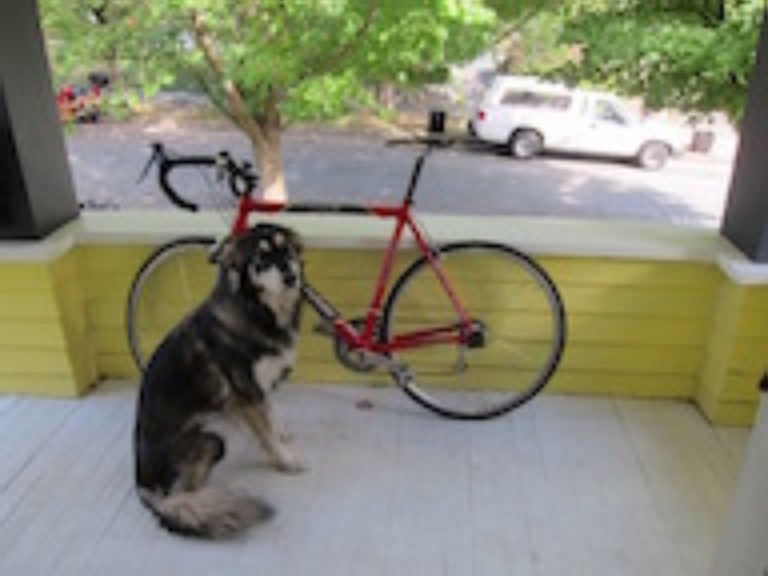

In [36]:
low_res_im = Image.open('dogsmall.jpg')
high_res_im = Image.open('dog.jpg')

width, height = int(low_res_im.width*4), int(low_res_im.height*4)
stretched_im = low_res_im.resize((low_res_im.width * 4, low_res_im.height * 4), resample=Image.NEAREST)

bilinear_im = imresize_bi(low_res_im, width, height)

print('Original image')
display(high_res_im)
print('Low res image stretched to full size')
display(stretched_im)
print('Original image with bilinear interpolation')
display(bilinear_im)

# PSNR and SSIM

In [37]:
# https://www.geeksforgeeks.org/python-peak-signal-to-noise-ratio-psnr/
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

def SSIM(original, compressed):
    if original.ndim == 3:
        original = np.dot(original[..., :3], [0.2989, 0.5870, 0.1140])
    if compressed.ndim == 3:
        compressed = np.dot(compressed[..., :3], [0.2989, 0.5870, 0.1140])
    return ssim(original, compressed, data_range=compressed.max() - compressed.min())


In [42]:
# Convert images to NumPy arrays for PSNR calculation
original_np = np.array(high_res_im)
bilinear_np = np.array(bilinear_im)

psnr_bilinear = PSNR(original_np, bilinear_np)
print(f"PSNR: Bilinear Interpolation vs. Original Image: {psnr_bilinear:.2f} dB")

ssim_bilinear = SSIM(original_np, bilinear_np)
print(f"SSIM: Bilinear Interpolation vs. Original Image: {ssim_bilinear:.2f}")

PSNR: Bilinear Interpolation vs. Original Image: 31.82 dB
SSIM: Bilinear Interpolation vs. Original Image: 0.73
